In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0, 0.5, 'Y')

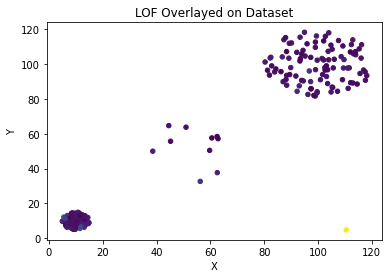

In [88]:
data = pd.read_csv('data/data.csv', names=["x","y"])
results = pd.read_csv('data/results/averagelrd/part-00000', names=["index1","LRD"])
data['index1'] = data.index
merged = pd.merge(data,results,on="index1")
merged['index1']
merged.LRD =merged.LRD
fig = plt.scatter(merged.x,merged.y, s=20, c=merged.LRD)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.ylabel("Y")

In [91]:
merged.loc[(merged.y <20) & (merged.x>100)]

,x,y,index1,LRD
210,110.495793,4.828747,210,3.647902


In [83]:
merged.loc[(merged.y >80) & (merged.x>80)]

,x,y,index1,LRD
100,99.014162,109.523480,100,1.039293
101,95.942175,111.502620,101,0.986673
102,111.201148,85.951341,102,1.020425
103,92.116067,106.628890,103,1.008884
104,116.030646,103.306433,104,1.068432
...,...,...,...,...
195,87.952145,115.074300,195,0.981484
196,99.041267,112.512599,196,0.977760
197,111.008626,97.600934,197,1.095423
198,80.333379,101.071480,198,1.101440


In [90]:
merged.loc[(merged.x > 30) & (merged.x<70)]

,x,y,index1,LRD
200,60.531920,57.558885,200,0.954643
201,62.568419,37.659759,201,1.169753
202,38.577879,49.964603,202,1.141051
203,59.735555,50.431548,203,1.025772
204,45.199392,55.649935,204,0.994850
205,44.537384,64.608600,205,1.041157
206,50.943218,63.708840,206,1.028843
207,62.837904,57.126414,207,0.954643
208,56.228593,32.648922,208,1.297047
209,62.490244,58.369773,209,0.954643


Text(0.5, 1.0, 'LOF Overlayed on Dataset')

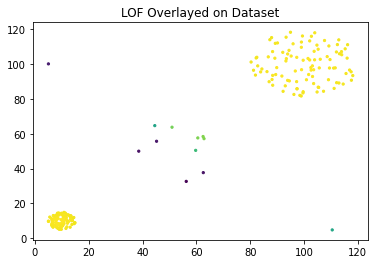

In [86]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50)
data2 = data.copy().append({'x':5,'y':100}, ignore_index=True)
clf.fit_predict(data2[["x","y"]].to_numpy())
data2["LOF"] = clf.negative_outlier_factor_ 
fig = plt.scatter(data2.x,data2.y, s=5, c=data2.LOF)
plt.title("LOF Overlayed on Dataset")

In [30]:
 clf.negative_outlier_factor_ > 1.2

array([False, False, False, ..., False, False, False])

In [45]:
groups = merged1.groupby('LRD')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

NameError: name 'merged1' is not defined

In [89]:
merged

,x,y,LRD
0,9.616232,6.821204,False
1,10.757276,12.782887,False
2,10.383064,9.921313,False
3,14.721831,8.904125,False
4,14.576181,8.423416,False
...,...,...,...
2005,43.330490,45.680367,False
2006,36.533063,41.937020,False
2007,49.164949,36.293804,False
2008,51.274593,43.378843,False


In [47]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5, contamination=.1)
y_pred = clf.fit_predict(data)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=data[LOF_pred==1]

In [48]:
data2 = data.copy()
data2['lof'] = LOF_Scores.tolist()
data2

,x,y,index1,lof
0,9.616232,6.821204,0,-1.051271
1,10.757276,12.782887,1,-0.991863
2,10.383064,9.921313,2,-1.062721
3,14.721831,8.904125,3,-1.012531
4,14.576181,8.423416,4,-1.015741
...,...,...,...,...
206,50.943218,63.708840,206,-1.038994
207,62.837904,57.126414,207,-0.950607
208,56.228593,32.648922,208,-1.282836
209,62.490244,58.369773,209,-0.950607


Text(0.5, 0, 'Y')

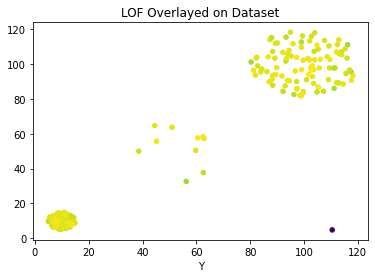

In [49]:
fig = plt.scatter(data2.x,data2.y, s=20, c=data2.lof)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.xlabel("Y")

In [51]:
data2.lof

0     -1.051271
1     -0.991863
2     -1.062721
3     -1.012531
4     -1.015741
         ...   
206   -1.038994
207   -0.950607
208   -1.282836
209   -0.950607
210   -3.564660
Name: lof, Length: 211, dtype: float64

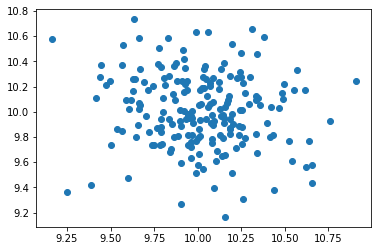

In [50]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

plt.scatter(x[:,0], x[:,1])
plt.show()

In [23]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
y_pred = lof.fit_predict(data.drop(['index1'],axis=1).to_numpy())
lofs_index = where(y_pred==-1)
values = data[lofs_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

TypeError: '(array([  37,   60,   99,  123,  221,  243,  250,  301,  322,  335,  341,
        375,  389,  487,  541,  652,  753,  768,  826,  863,  954,  957,
       1021, 1050, 1056, 1124, 1148, 1186, 1354, 1425, 1448, 1468, 1508,
       1515, 1533, 1581, 1614, 1616, 1621, 1659, 1664, 1665, 1685, 1708,
       1714, 1799, 1841, 1865, 1872, 1913, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010]),)' is an invalid key

In [21]:
data.drop(['index1'],axis=1)

,x,y
0,9.616232,6.821204
1,10.757276,12.782887
2,10.383064,9.921313
3,14.721831,8.904125
4,14.576181,8.423416
...,...,...
2006,36.533063,41.937020
2007,49.164949,36.293804
2008,51.274593,43.378843
2009,44.288244,45.875986
